# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read in the data set
df = pd.read_csv('ames.csv')

# Display the first few rows to check the data
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [ ]:
# Clean and pre-process the data if necessary
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Since data is clean, we can focus on the relevant features
# Select only the relevant columns for this analysis (Independent and Dependent variables)
df = df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']]

# Confirm the selection
df.head()

Missing values per column:
 Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64


,Gr_Liv_Area,Garage_Area,Sale_Price
0,1656,528,215000
1,896,730,105000
2,1329,312,172000
3,2110,522,244000
4,1629,482,189900


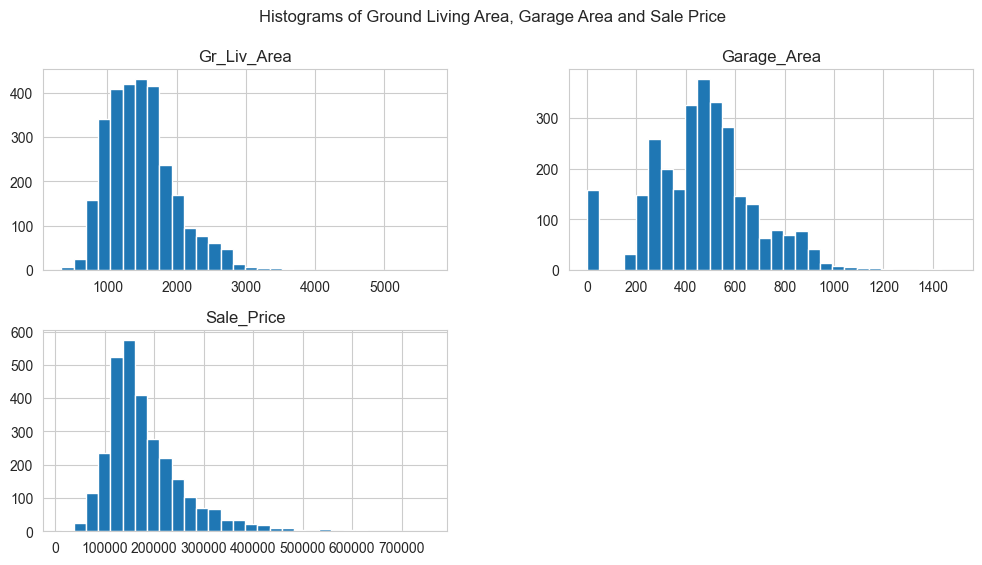

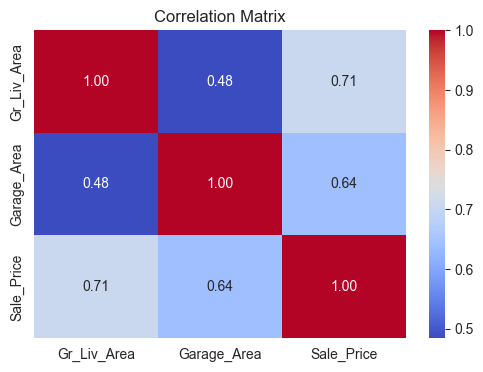

In [ ]:
# Explore the data with visualisations such as histograms and correlation matrices
# Set up the style for plots
sns.set_style('whitegrid') # Add a white grid background to the plots
                           # Makes it easier to read the data 

# Plot histograms of the variables
# Shows the distribution of the data
# Data is normally distributed (Gaussian)
df.hist(bins=30, figsize=(12,6))
plt.suptitle('Histograms of Ground Living Area, Garage Area and Sale Price')
plt.show()

# Plot correlation matrix heatmap
corr_matrix = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Histograms** show data is normally distributed.  

**Correlation heat maps** show a strong positive correlation between both independent variables and the dependent variable; with Ground Living Area being slighlty more strongly correlated with Sale Price than Garage Area.

In [58]:
# Split the independent variables from the dependent variable
# Define the independent variables
X = df[['Gr_Liv_Area', 'Garage_Area']]

# Define the dependent variable
y = df['Sale_Price']

# Confirm the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2930, 2)
Shape of y: (2930,)


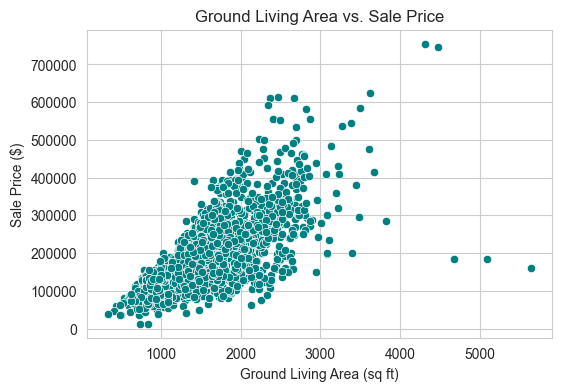

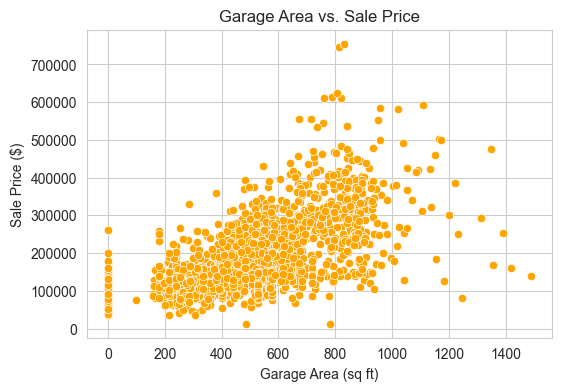

In [104]:
# Explore relationships between the independent and dependent variables
# Scatter plot: Gr_Liv_Area vs. Sale_Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Gr_Liv_Area', y='Sale_Price', data=df, color='teal')
plt.title('Ground Living Area vs. Sale Price')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()

# Scatter plot: Garage_Area vs. Sale_Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Garage_Area', y='Sale_Price', data=df, color='orange')
plt.title('Garage Area vs. Sale Price')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()

In [ ]:
# Create a training and test set with a 75:25 split ratio
# Split the data into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42       # Random state for reproducibility
)

# Confirm the shape of the splits
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2197, 2)
Test set shape: (733, 2)


In [119]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
# Create the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [125]:
# Print the model intercept and coefficients
# Print the intercept
print("Intercept:", model.intercept_)

# Print the coefficients
print("Coefficients:", model.coef_)

Intercept: -5059.448195610399
Coefficients: [ 78.69286848 141.14571761]


In [130]:
# Generate predictions for the test set
# Use the model to predict Sale_Price for the test set
y_pred = model.predict(X_test)

# Display the first 10 predicted values
print("First 10 predictions:", y_pred[:10])

First 10 predictions: [158224.09430889 113256.67578876 217552.81911301  72846.49160079
  94782.71287234 159556.51682943 147050.44791809 171621.4840609
  81392.38908909 283579.83964666]


In [135]:
# Evaluate the model
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 2634371879.69
Root Mean Squared Error (RMSE): 51326.13


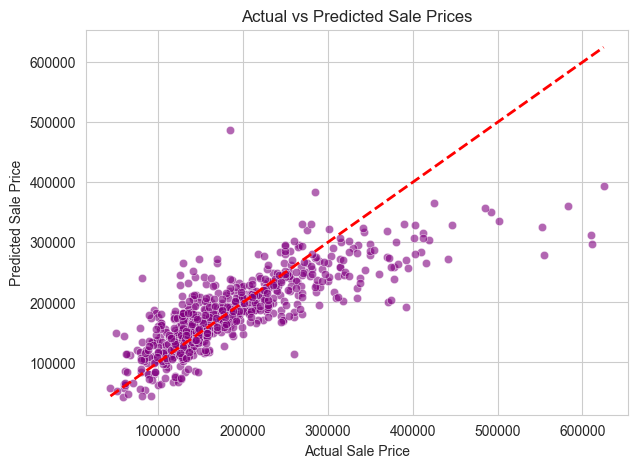

In [160]:
# Generate a plot to visualize the model's performance
# Plot the actual vs predicted values
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Reference line
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.show()


In [162]:
# Print the coefficients with labels
coefficients = pd.DataFrame({
    'Feature': ['Gr_Liv_Area', 'Garage_Area'],
    'Coefficient': model.coef_
})
print(coefficients)


       Feature  Coefficient
0  Gr_Liv_Area    78.692868
1  Garage_Area   141.145718


# **Interpret coefficients in the context of the prediction:**  

For each additional square foot of **above-ground living area** (Gr_Liv_Area), the house price is predicted to increase by approximately **$78.69**.

For each additional square foot of **garage area** (Garage_Area), the house price is predicted to increase by approximately **$141.15**.

# **Summarise findings**  

In this project, we explored the relationship between house sale prices and two key features: above-ground living area and garage size, using the Ames housing dataset. Our exploratory data analysis showed that both variables have a positive correlation with sale price, with living area exhibiting a stronger relationship.

A multiple linear regression model was built and trained on 75% of the data, and then tested on the remaining 25%. The model achieved a Root Mean Squared Error (RMSE) of approximately $51,326, indicating that on average, the predicted sale prices deviated from actual prices by this amount. Given the wide range of housing prices, this level of error is reasonable for a model using only two predictors.

The regression coefficients suggest that each additional square foot of living space increases the expected sale price by around $79, while each additional square foot of garage space contributes approximately $141 to the sale price. These insights highlight the importance of garage size alongside living space in influencing home values in Ames, Iowa.

Overall, the model provides a straightforward and interpretable way to estimate house prices using easily measurable property features. For further improvement, incorporating additional relevant variables and exploring more complex models could enhance prediction accuracy